# IMPORT LIBRARY

In [32]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# IMPORT DATA

In [2]:
dataset = pd.read_csv("Iris.csv") 

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
dataset.drop('Id',inplace=True,axis=1) 


In [6]:
X = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,-1].values 

In [9]:
dataset.head().style.background_gradient(cmap=sns.dark_palette("blue", as_cmap=True))


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.100000,3.500000,1.400000,0.200000,Iris-setosa
1,4.900000,3.000000,1.400000,0.200000,Iris-setosa
2,4.700000,3.200000,1.300000,0.200000,Iris-setosa
3,4.600000,3.100000,1.500000,0.200000,Iris-setosa
4,5.000000,3.600000,1.400000,0.200000,Iris-setosa


# EDA

Data Distribution

In [29]:
colors = sns.color_palette(['#003f5c', '#0077b6', '#00b4d8'])  # Dark to light blue shades


In [30]:
data_counts = dataset['Species'].value_counts()


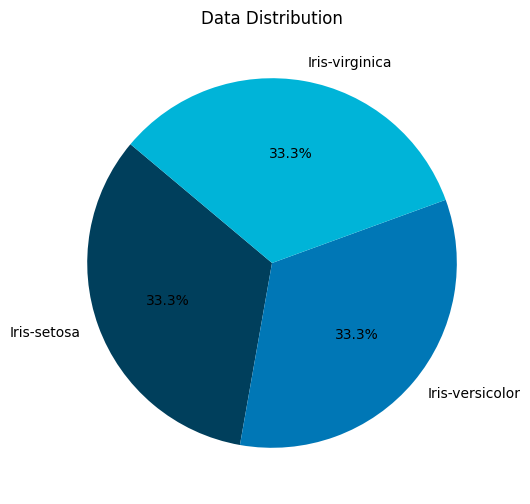

In [33]:
plt.figure(figsize=(8, 6))
plt.pie(data_counts, labels=data_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Data Distribution')
plt.show()

Sepal length

C:\Users\hanss\AppData\Local\Temp\ipykernel_21968\244732176.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




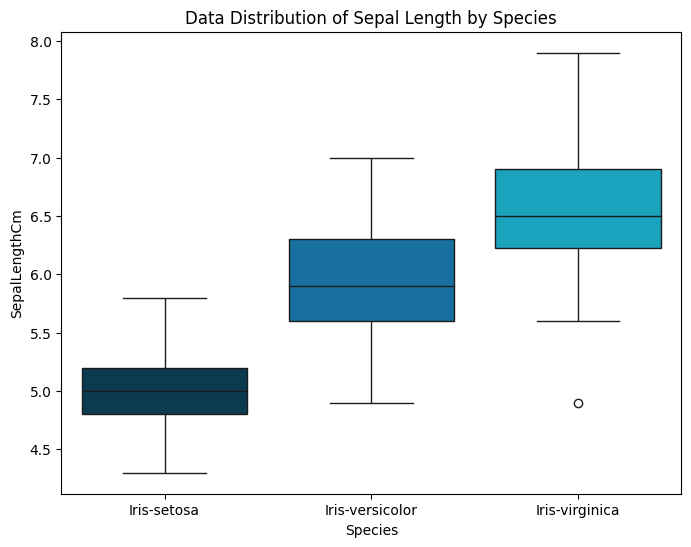

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Species', y='SepalLengthCm', palette=colors)
plt.title('Data Distribution of Sepal Length by Species')
plt.show()

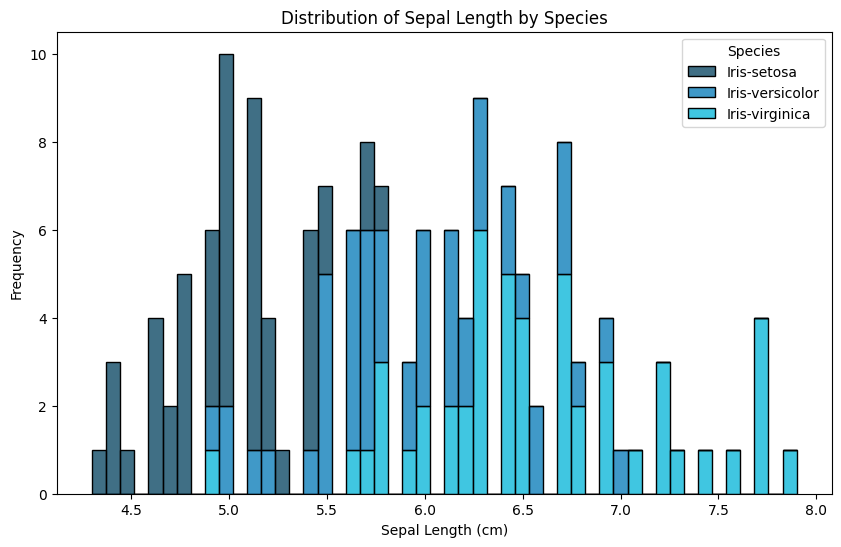

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='SepalLengthCm', hue='Species', palette=colors, bins=50, multiple='stack')

plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

sepal width

C:\Users\hanss\AppData\Local\Temp\ipykernel_21968\1232691776.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




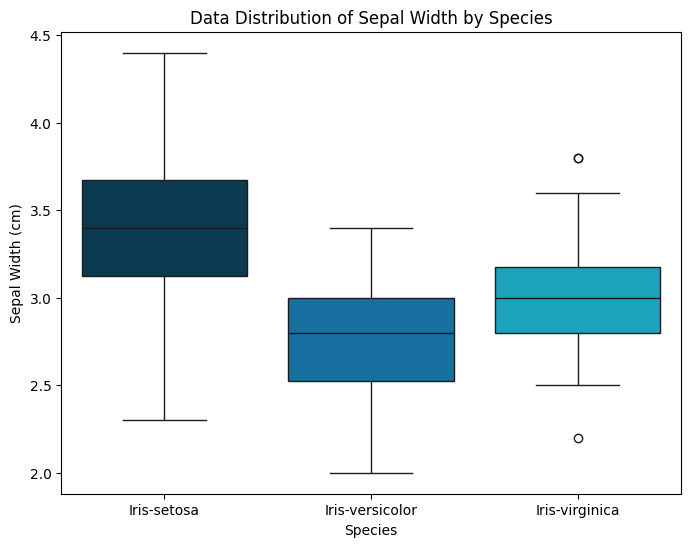

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Species', y='SepalWidthCm', palette=colors)

plt.title('Data Distribution of Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

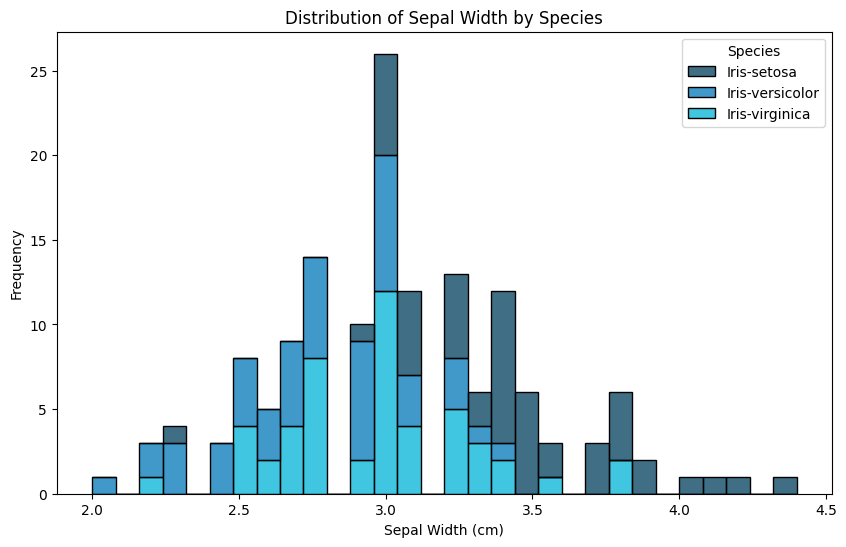

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='SepalWidthCm', hue='Species', palette=colors, bins=30, multiple='stack')

plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.show()

petal length

C:\Users\hanss\AppData\Local\Temp\ipykernel_21968\2650275632.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




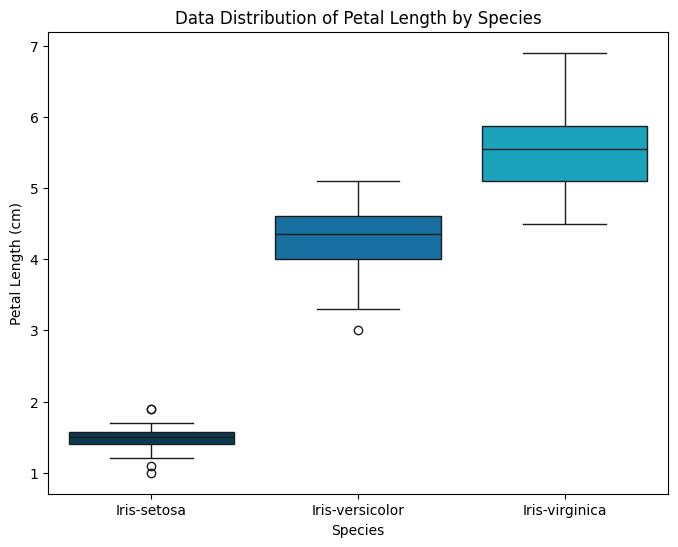

In [43]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Species', y='PetalLengthCm', palette=colors)

plt.title('Data Distribution of Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

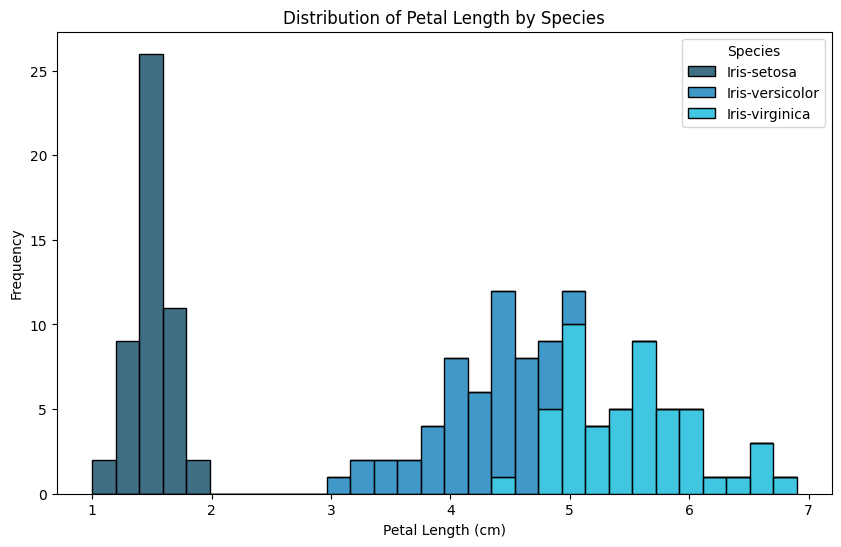

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='PetalLengthCm', hue='Species', palette=colors, bins=30, multiple='stack')

plt.title('Distribution of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.show()

petal width

C:\Users\hanss\AppData\Local\Temp\ipykernel_21968\1293755752.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




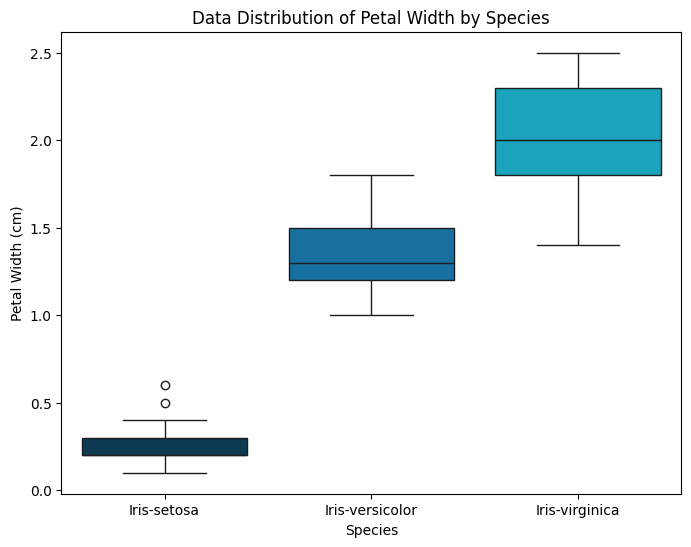

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=dataset, x='Species', y='PetalWidthCm', palette=colors)

# Set the title and labels
plt.title('Data Distribution of Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

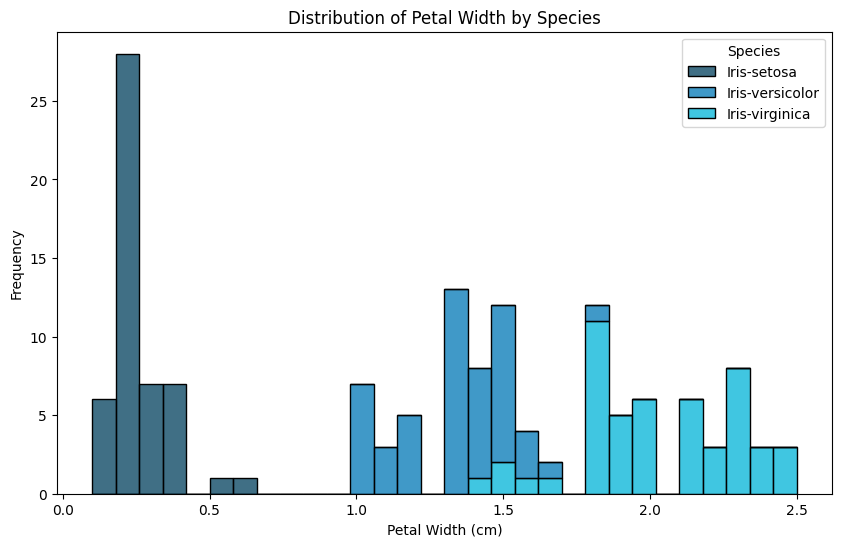

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dataset, x='PetalWidthCm', hue='Species', palette=colors, bins=30, multiple='stack')

plt.title('Distribution of Petal Width by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.show()

# conclusion :

The Setosa species exhibits notably smaller petal widths than the other two species.
The difference in petal width between Virginica and Versicolor is not as distinct.
In general, petal width emerges as a valuable feature for distinguishing between these species.

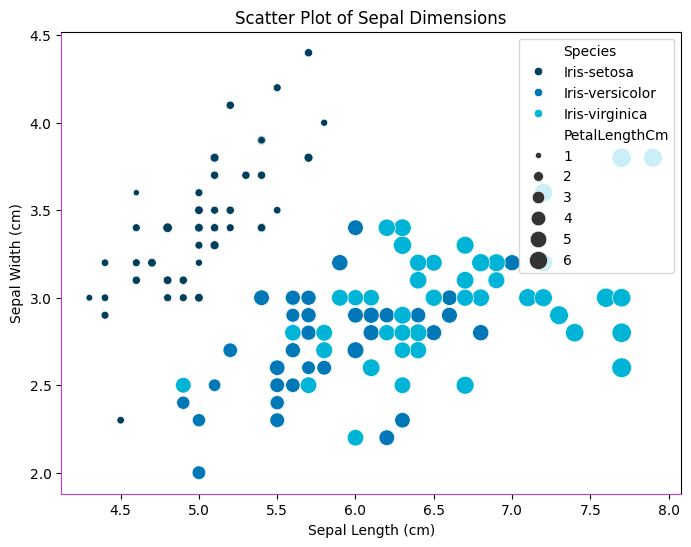

In [53]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=dataset, x='SepalLengthCm', y='SepalWidthCm', 
                          hue='Species', size='PetalLengthCm', 
                          sizes=(20, 200), palette=colors)
plt.title('Scatter Plot of Sepal Dimensions')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')

scatter.spines['bottom'].set_color('#BF40BF')
scatter.spines['left'].set_color('#BF40BF')

plt.show()

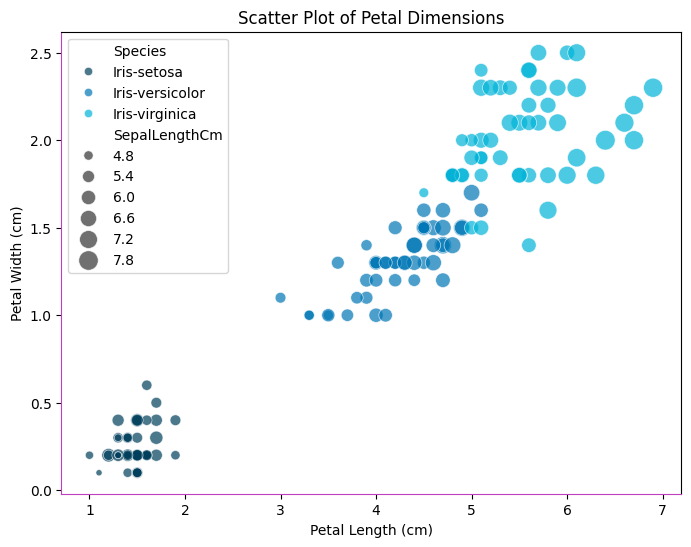

In [55]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(data=dataset, x='PetalLengthCm', y='PetalWidthCm', 
                          hue='Species', size='SepalLengthCm', 
                          sizes=(20, 200), palette=colors,
                          alpha=0.7)

# Set the title and labels
plt.title('Scatter Plot of Petal Dimensions')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

# Customize the axes colors
scatter.spines['bottom'].set_color('#BF40BF')
scatter.spines['left'].set_color('#BF40BF')

# Show the plot
plt.show()

# KMEANS


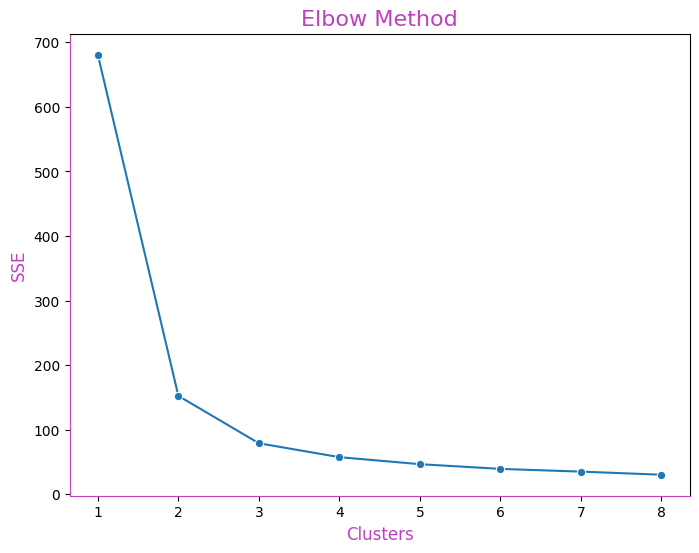

In [57]:
sse = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=42)  # Added random_state for reproducibility
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 9), y=sse, marker='o')

plt.title('Elbow Method', fontsize=16, color="#BF40BF")
plt.xlabel('Clusters', fontsize=12, color="#BF40BF")
plt.ylabel('SSE', fontsize=12, color="#BF40BF")

plt.gca().spines['bottom'].set_color('#BF40BF')
plt.gca().spines['left'].set_color('#BF40BF')

plt.show()

In [58]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
clusters = kmeans.fit_predict(X)

# EVALUATION

In [60]:
labels = ['Iris-setosa', 'Iris-versicolour', 'Iris-virginica']


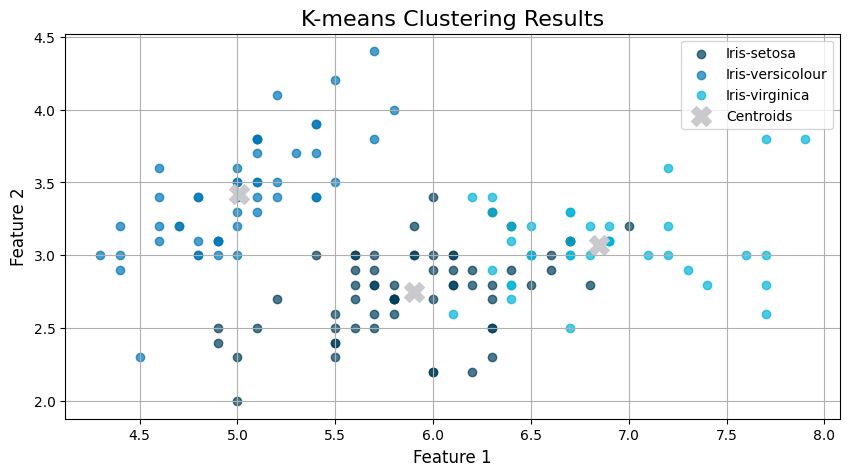

In [61]:
plt.figure(figsize=(10, 5))

for i in range(len(colors)):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], 
                color=colors[i], label=labels[i], alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            color='#CAC9CD', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering Results', fontsize=16)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)

plt.legend()

plt.grid()
plt.show()